In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

%matplotlib inline

### Одновыборочный T-test

Дана одна выборка $X_1, ..., X_n$.

Критерий проверяет гипотезы

$\mathsf{H}_0\colon \mathsf{E} X = a_0$

$\mathsf{H}_1\colon \mathsf{E} X \not= a_0$

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp">`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

* `a` &mdash; выборка
* `popmean` &mdash; равно $a_0$

In [2]:
sample = sps.norm(loc=0).rvs(size=100)
sps.ttest_1samp(sample, 0), sps.ttest_1samp(sample, 0.5)

(Ttest_1sampResult(statistic=0.3487931260954594, pvalue=0.7279853282131905),
 Ttest_1sampResult(statistic=-4.380825312651964, pvalue=2.942675495436868e-05))

### Двухвыборочный T-test &mdash; независимые выборки

Даны две независимые выборки

* $X_1, ..., X_n$,

* $Y_1, ..., Y_m$.

Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon \mathsf{E} X_1 = \mathsf{E} X_2$

$\mathsf{H}_1\colon \mathsf{E} X_1 \not= \mathsf{E} X_2$

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` &mdash; выборка

`equal_var` &mdash; известно ли равенство дисперсий

In [18]:
sample_1 = sps.norm(loc=0).rvs(size=1000)
sample_2 = sps.norm(loc=1).rvs(size=1000)
sps.ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=-23.1079374630744, pvalue=6.720143014844482e-105)

In [10]:
sample_1 = sps.norm(loc=0).rvs(size=1000)
sample_2 = sps.norm(loc=1, scale=7).rvs(size=1000)
sps.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=-7.080070190423102, pvalue=2.6528842256112686e-12)

### Двухвыборочный T-test &mdash; связные выборки

Даны две связные выборки

* $X_1, ..., X_n$,

* $Y_1, ..., Y_n$.


Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon \mathsf{E} X_1 = \mathsf{E} X_2$

$\mathsf{H}_1\colon \mathsf{E} X_1 \not= \mathsf{E} X_2$

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` &mdash; выборка

In [5]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=0.9026071474401693, pvalue=0.36892530750055563)

In [6]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0.5, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-10.458532812616314, pvalue=1.0955913874770508e-17)

### Пример: ирисы Фишера

Визуализация данных

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


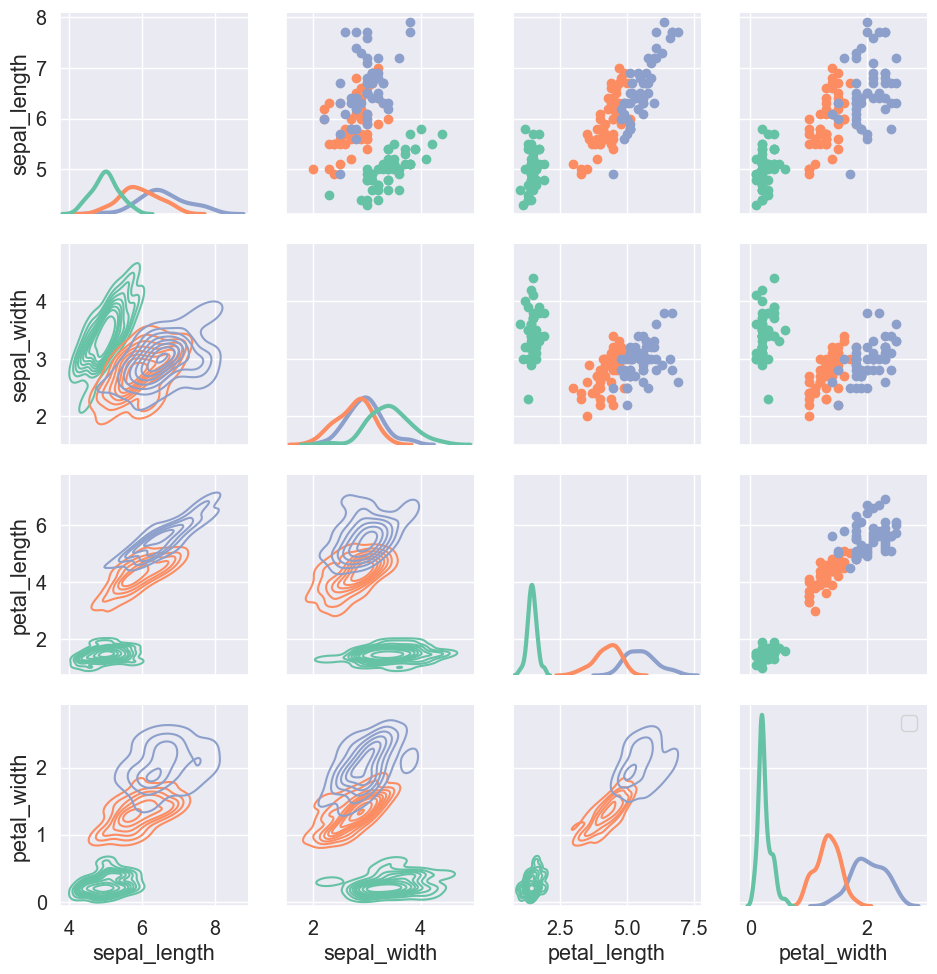

In [7]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Как выглядят данные

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Виды ирисов

In [9]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
sps.ttest_ind(df[df.species == 'setosa'].sepal_length,
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [11]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_length,
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07)

In [12]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_width,
              df[df.species == 'versicolor'].sepal_width,
              equal_var=False)

Ttest_indResult(statistic=3.2057607502218186, pvalue=0.001819483482104968)

*Замечание.* Строго говоря, неоходима поправка на множественное тестирование гипотез.

**Вывод** нулевую гипотезу о равенстве sepal_width можем отвергнуть только для (virginica,versicolor)

## AA-тесты: валидация критериев

Напишем функцию, реализующую относительный t-test. Функция возвращает значение статистики, доверительный интервал, p-value.

Для подсчёта статистики воспользуемся следующей формулой

$$R = \overline{X} / \overline{Y} - 1$$

где n - размер выборки. Вам здесь поможет функция `np.var`

Для подсчёта `pvalue` найдите вероятность того, что стандартно распределённая случайная велечина имеет значение по модулю болшее чем

$$z = \sqrt{n}\frac{|R|}{\sqrt{\frac{\overline{(X - \overline{X})^2}}{\overline{Y}^2} + \frac{\overline{(Y - \overline{Y})^2}\overline{X}^2}{\overline{Y}^4}}}$$

Вам понадобится функция `sps.norm.sf`

Посчитайте доверительный интервал. Для этого найдите

$$q = \Phi^{-1}(1-\alpha/2)$$

где $\Phi$ - функция распределения стандартного нормального распределения (воспользуйтесь методом `sps.norm.ppf`), $\alpha$ - уровень значимости. Затем от $R$ отложите

$$\frac{q \cdot \sigma_R}{\sqrt{n}}$$

где $\sigma_R$ - знаменатель из формулы для расчёта $z$.

In [35]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = x_mean/y_mean-1
    std = (np.var(x)/(y_mean**2)+np.var(y)*x_mean**2/(y_mean**4))**0.5

    z = n**0.5*np.abs(stat)/std
    pvalue = 2*sps.norm.sf(z)

    q = sps.norm.ppf(1-alpha/2)
    left_bound = stat - q*std/(n**0.5)
    right_bound = stat + q*std/(n**0.5)

    return stat, left_bound, right_bound, pvalue

In [36]:
def calculate_real_alpha(n_errors, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.

    Аргументы:
    n_errors -- количество ошибок в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_alpha, right_alpha -- границы соотв. дов. интервала
    '''

    real_alpha = n_errors / n_iter
    std = np.sqrt(real_alpha * (1-real_alpha) / n_iter)
    left_alpha = real_alpha - 2 * std
    right_alpha = real_alpha + 2 * std

    return real_alpha, left_alpha, right_alpha

In [37]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для реального уровня значимости
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1, color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_alpha, right_alpha], [0.1]*2, [-0.1]*2, color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
    plt.title('Доля отвержений')
    plt.ylim((-0.5, 0.5))
    plt.yticks([])

In [38]:
def AB_test(
    distr1, distr2, n_iter=10000, sample_size=1000, alpha=0.05
):
    '''
    Проведение серии AB-тестов на искусственных выборках.

    Аргументы:
    distr1, distr2 -- распределения для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- уровень значимости
    '''

    n_errors = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        x = distr1.rvs(size=sample_size)
        y = distr2.rvs(size=sample_size)
        n_errors += relative_ttest(x, y)[3] < alpha

    # Реальный уровень значимости
    real_alpha, left_alpha, right_alpha = calculate_real_alpha(n_errors, n_iter)
    print('{:.4f} +/- {:.4f}'.format(
        real_alpha, (right_alpha - left_alpha)/2
    ))

    plt.figure(figsize=(14, 3.5))

    # График плотности распределений
    with sns.axes_style("darkgrid"):
        plt.subplot(1, 2, 1)
        for d, label in zip([distr1, distr2], ['A', 'B']):
            grid = np.linspace(d.ppf(0.005) - 0.2, d.ppf(0.995) + 0.2, 1000)
            plt.plot(grid, d.pdf(grid), label=label, lw=3)
        plt.legend()
        plt.title('Плотности выборок')

    # График интервала
    with sns.axes_style("whitegrid"):
        plt.subplot(1, 2, 2)
        draw_interval(
            real_alpha, left_alpha, right_alpha,
            alpha=alpha, new_fig=False
        )

    plt.tight_layout()

Проверим корректность критерия методом AA-тестирования на искусственных данных. Рассмотрите разные виды распределений и разный размер выборки. Представим полученные результаты в удобном виде.

In [39]:
n_iter = 200000  # количество итераций в одном эксперименте
alpha = 0.05  # уровень значимости

#### Экспоненциальное распределение

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:29<00:00, 2243.23it/s]


0.1154 +/- 0.0014


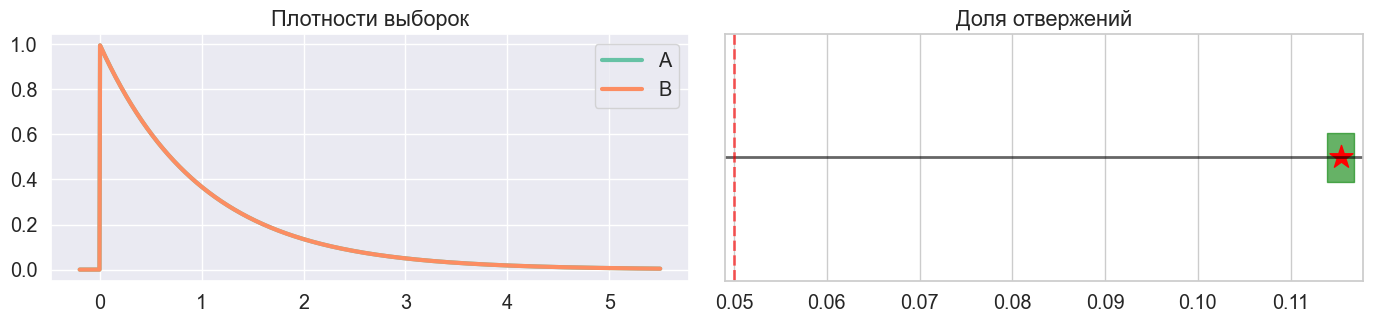

In [40]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=10, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:28<00:00, 2258.16it/s]


0.0579 +/- 0.0010


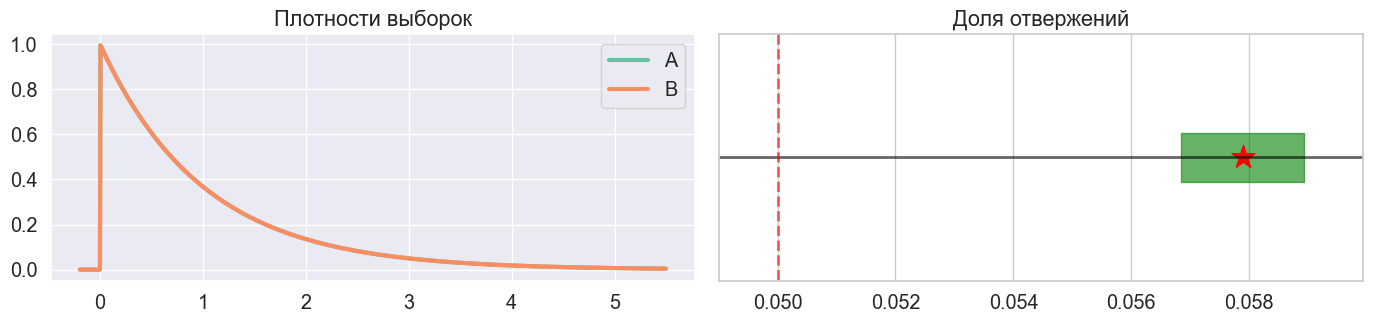

In [41]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=100, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:36<00:00, 2069.68it/s]


0.0513 +/- 0.0010


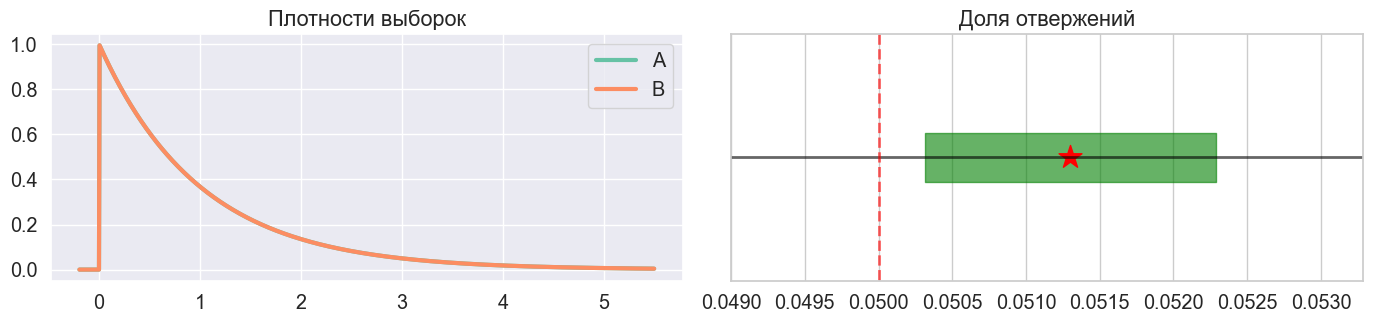

In [42]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=1000, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [02:52<00:00, 1156.84it/s]


0.0499 +/- 0.0010


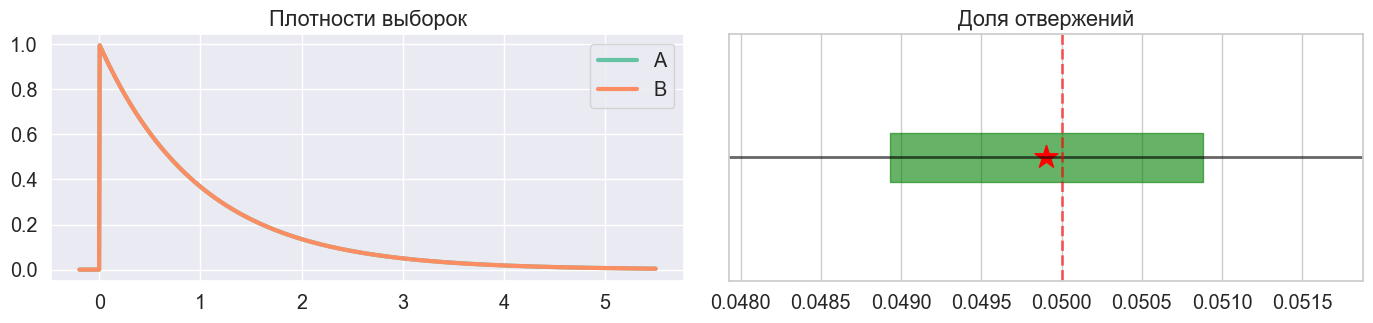

In [43]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=10000, alpha=alpha)

#### Гамма-распределение

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:35<00:00, 2091.92it/s]


0.0919 +/- 0.0013


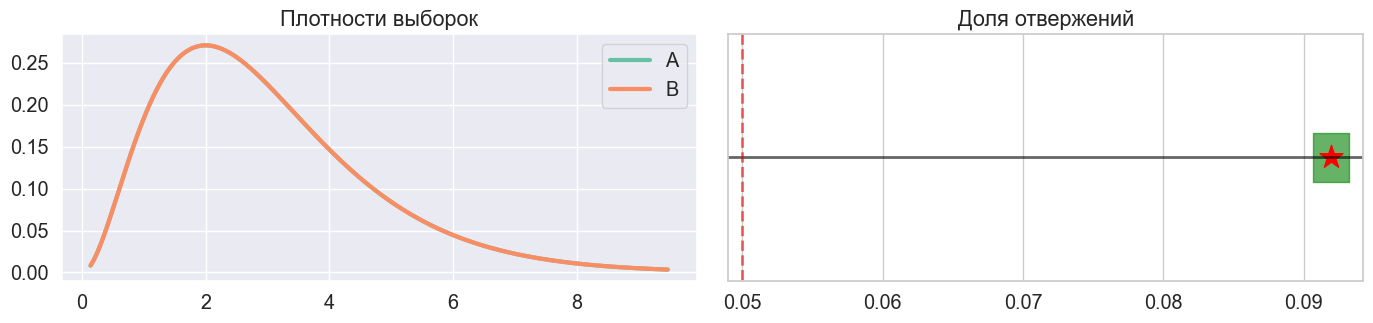

In [44]:
AB_test(sps.gamma(a=3), sps.gamma(a=3), n_iter=n_iter, sample_size=10, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:37<00:00, 2058.06it/s]


0.0547 +/- 0.0010


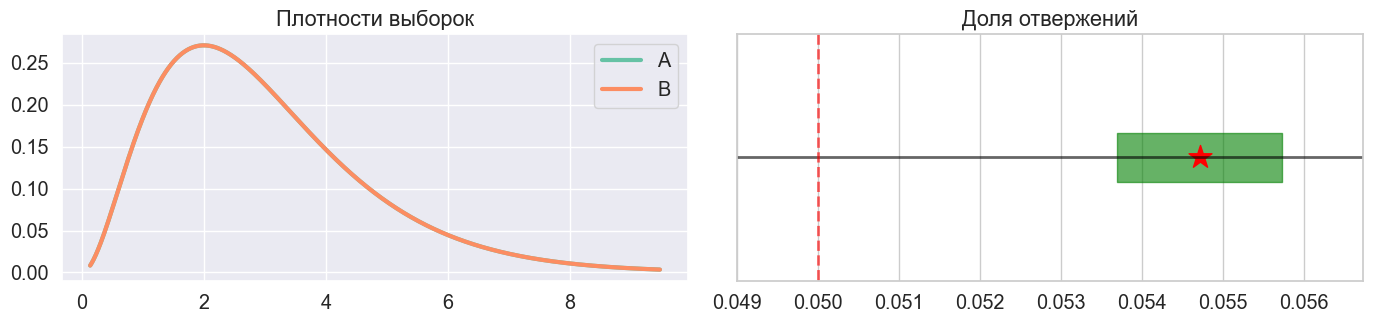

In [45]:
AB_test(sps.gamma(a=3), sps.gamma(a=3), n_iter=n_iter, sample_size=100, alpha=alpha)

100%|█████████████████████████████████████████████████████████████████████████| 200000/200000 [05:12<00:00, 640.92it/s]


0.0506 +/- 0.0010


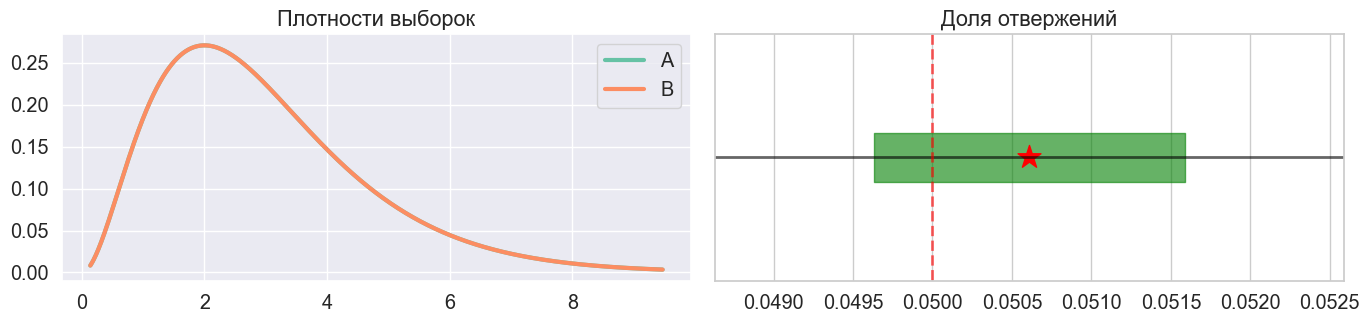

In [46]:
AB_test(sps.gamma(a=3), sps.gamma(a=3), n_iter=n_iter, sample_size=10000, alpha=alpha)

#### Распределение Коши

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:44<00:00, 1907.80it/s]


0.0219 +/- 0.0007


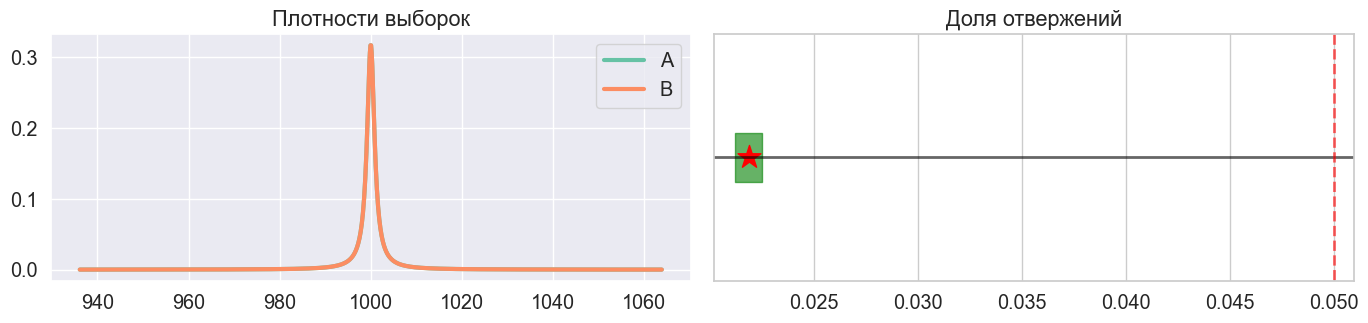

In [47]:
AB_test(sps.cauchy(loc=1000), sps.cauchy(loc=1000), n_iter=n_iter, sample_size=1000, alpha=alpha)

Коши не имеет дисперсии, поэтому ничего не получается

#### Нормальное распределение

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:29<00:00, 2236.36it/s]


0.0720 +/- 0.0012


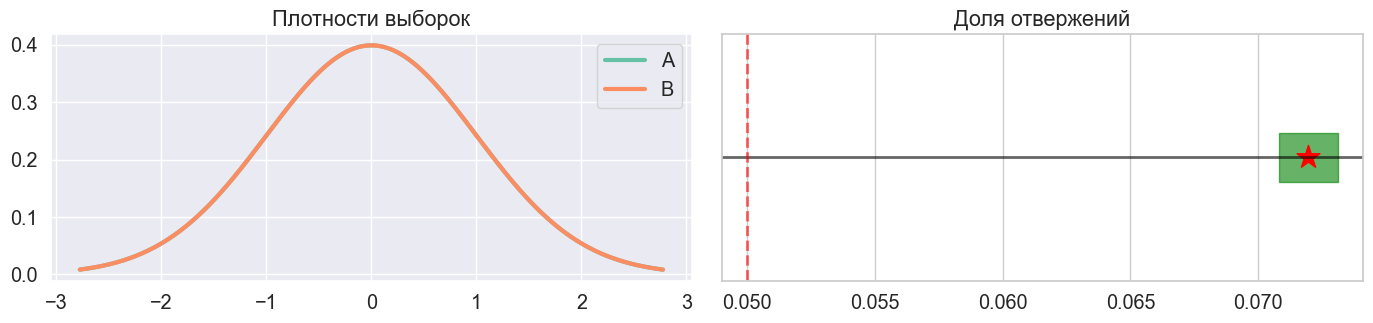

In [48]:
AB_test(sps.norm, sps.norm, n_iter=n_iter, sample_size=100, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:39<00:00, 2000.47it/s]


0.0702 +/- 0.0011


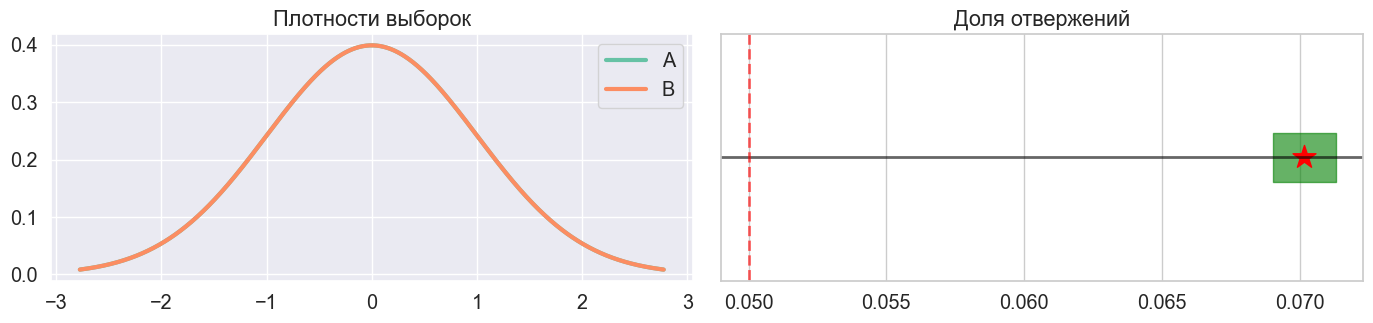

In [49]:
AB_test(sps.norm, sps.norm, n_iter=n_iter, sample_size=1000, alpha=alpha)

**Вывод:**

Чем больше выборка, тем лучше результат(если это не Коши), ведь мы подаём одинаковые рапределения с одинаковым средним.

#### Мощность для распределения

Зафиксируйте тип распределения и размер выборки. Исследуйте мощность критерия помощью добавления смещения к одной из выборок.

In [50]:
alpha=0.05

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:35<00:00, 2086.33it/s]


0.0565 +/- 0.0010


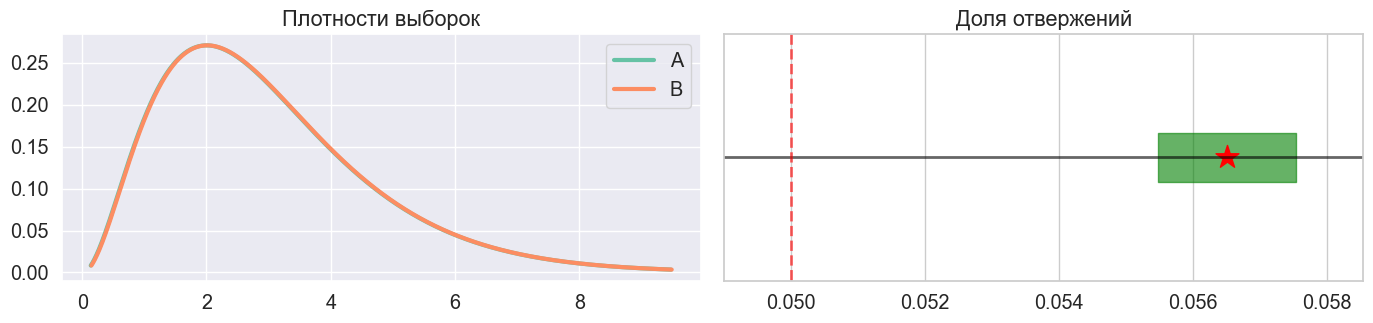

In [51]:
AB_test(sps.gamma(a=3), sps.gamma(a=3, loc=0.01), n_iter=n_iter, sample_size=100, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:34<00:00, 2117.73it/s]


0.0888 +/- 0.0013


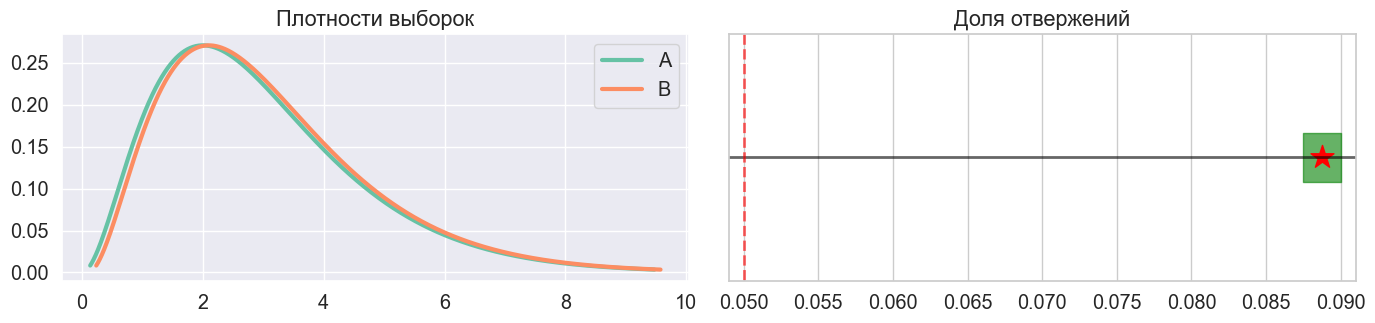

In [52]:
AB_test(sps.gamma(a=3), sps.gamma(a=3, loc=0.1), n_iter=n_iter, sample_size=100, alpha=alpha)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:34<00:00, 2124.45it/s]


0.9858 +/- 0.0005


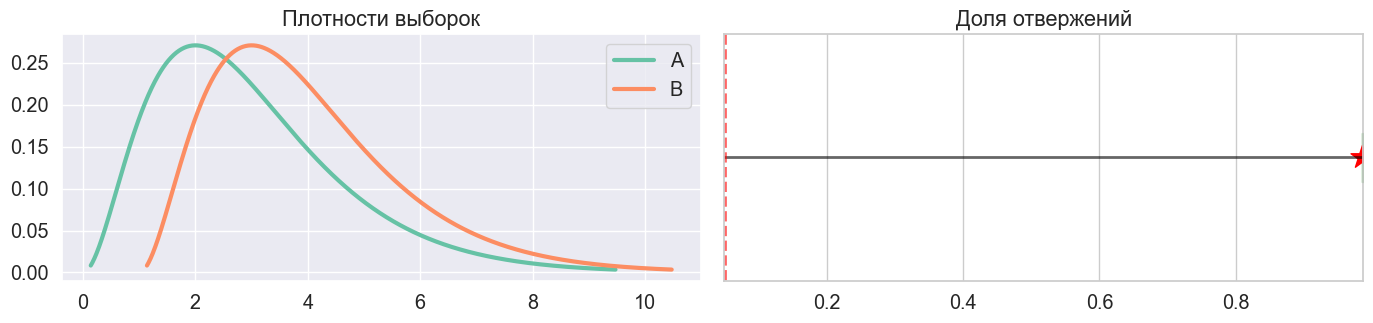

In [53]:
AB_test(sps.gamma(a=3), sps.gamma(a=3, loc=1), n_iter=n_iter, sample_size=100, alpha=alpha)

Рассмотрим сетку значений сдвига

In [54]:
n_errors = []  # количество отвержений H_0
sample_size = 1000
shifts = np.linspace(0, 0.5, 21)

for loc in tqdm(shifts):
    n_errors.append(0)
    for _ in range(n_iter):
        x = sps.gamma.rvs(a=3, size=sample_size)
        y = sps.gamma.rvs(a=3, size=sample_size) + loc
        n_errors[-1] += relative_ttest(x, y)[3] < alpha

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [43:05<00:00, 123.13s/it]


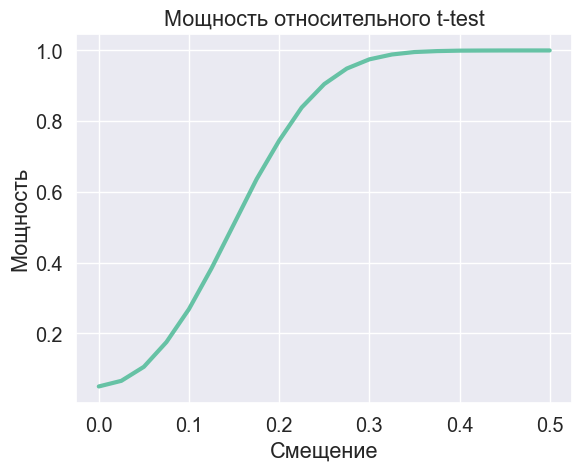

In [55]:
plt.plot(shifts, np.array(n_errors)/n_iter, lw=3)
plt.title('Мощность относительного t-test')
plt.xlabel('Смещение')
plt.ylabel('Мощность');

**Вывод:**

Чем больше смещение(различие распределений), тем чаще мы это детектируем. Всё логично